In [1]:
!pip install python-docx

In [8]:
import csv
import pandas as pd

data_book = pd.read_csv('dbms_train.csv', header=None, names=['data'],encoding="cp1252")
data_book


,data
0,Databases and Database Users Databases and dat...
1,For example if we go to the bank to deposit o...
2,Even purchasing items at a supermarket often ...
3,These interactions are examples of what we ma...
4,In the past few years advances in technology ...
...,...
13846,In this sense QBE was the first user friendly...
13847,More recently numerous other user friendly in...
13848,The use of menus graphics and forms is now be...
13849,Filling forms partially to issue a search req...


In [9]:
import gensim
from nltk.stem import WordNetLemmatizer
# nltk.download('omw-1.4')
def ls(text):
    return WordNetLemmatizer().lemmatize(text, pos='v')


# Tokenize and lemmatize
def pp(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(ls(token))
    return result

# print("\n")
prepro_data = []
for index,line in data_book.iterrows():
    prepro_data.append(pp(line['data']))

if __name__ == "__main__":
    print(prepro_data)

[['databases', 'database', 'users', 'databases', 'database', 'systems', 'essential', 'component', 'life', 'modern', 'society', 'encounter', 'activities', 'day', 'involve', 'interaction', 'database'], ['example', 'bank', 'deposit', 'withdraw', 'fund', 'hotel', 'airline', 'reservation', 'access', 'computerize', 'library', 'catalog', 'search', 'bibliographic', 'item', 'purchase', 'online', 'book', 'toy', 'chance', 'activities', 'involve', 'program', 'access', 'database'], ['purchase', 'items', 'supermarket', 'automatically', 'update', 'database', 'hold', 'inventory', 'grocery', 'items'], ['interactions', 'examples', 'traditional', 'database', 'applications', 'information', 'store', 'access', 'textual', 'numeric'], ['past', 'years', 'advance', 'technology', 'lead', 'excite', 'new', 'applications', 'database', 'systems'], ['new', 'media', 'technology', 'possible', 'store', 'image', 'audio', 'clip', 'video', 'stream', 'digitally'], ['type', 'file', 'important', 'component', 'multimedia', 'da

In [19]:
import gensim
from gensim import corpora

dict_ = corpora.Dictionary(prepro_data)

print(type(dict_))

# for i,j in dict_.items():
#     print(i, " ", j)
#
#
doc_term_matrix = [dict_.doc2bow(i) for i in prepro_data]
# print(doc_term_matrix)
#
Lda = gensim.models.ldamodel.LdaModel

ldamodel = Lda(doc_term_matrix, num_topics = 100, id2word = dict_, passes=1, random_state=0, eval_every=None)

print(ldamodel.print_topics())

for i in ldamodel.print_topics(num_topics=len(prepro_data), num_words=5):
    print(i)

# count = 0
# for i in ldamodel[doc_term_matrix]:
#     print("doc : ",count,i)
#     count += 1

# lda_model =  gensim.models.LdaMulticore(doc_term_matrix, num_topics = 8, id2word = dict_, passes = 10, workers = 2)
# print(lda_model.print_topic())

topicwise_words = []
topics = ldamodel.show_topics(formatted=False)

for i in range(len(topics)):
    topic_words = dict(topics[i][1])
    word = []
    for ky in topic_words:
        word.append(ky)
    topicwise_words.append(word)

print(topicwise_words)

<class 'gensim.corpora.dictionary.Dictionary'>
[(59, '0.148*"support" + 0.147*"tree" + 0.108*"mine" + 0.083*"label" + 0.059*"query" + 0.056*"additional" + 0.029*"data" + 0.025*"remain" + 0.024*"information" + 0.022*"base"'), (30, '0.212*"data" + 0.135*"structure" + 0.092*"tree" + 0.057*"products" + 0.050*"briefly" + 0.040*"divide" + 0.036*"load" + 0.036*"wide" + 0.031*"categories" + 0.031*"let"'), (63, '0.299*"key" + 0.058*"message" + 0.057*"reference" + 0.055*"unique" + 0.051*"primary" + 0.041*"solutions" + 0.035*"partial" + 0.029*"create" + 0.027*"replace" + 0.021*"foreign"'), (88, '0.197*"compute" + 0.095*"sequence" + 0.061*"privacy" + 0.049*"comparison" + 0.047*"owner" + 0.038*"instead" + 0.038*"atomic" + 0.036*"equality" + 0.031*"individuals" + 0.030*"example"'), (10, '0.108*"element" + 0.096*"directly" + 0.088*"command" + 0.051*"difference" + 0.042*"set" + 0.037*"sql" + 0.034*"table" + 0.032*"power" + 0.030*"cpu" + 0.027*"intersection"'), (16, '0.147*"refer" + 0.102*"new" + 0.093

In [20]:
for word in dict_.items():
    print(word)

(0, 'activities')
(1, 'component')
(2, 'database')
(3, 'databases')
(4, 'day')
(5, 'encounter')
(6, 'essential')
(7, 'interaction')
(8, 'involve')
(9, 'life')
(10, 'modern')
(11, 'society')
(12, 'systems')
(13, 'users')
(14, 'access')
(15, 'airline')
(16, 'bank')
(17, 'bibliographic')
(18, 'book')
(19, 'catalog')
(20, 'chance')
(21, 'computerize')
(22, 'deposit')
(23, 'example')
(24, 'fund')
(25, 'hotel')
(26, 'item')
(27, 'library')
(28, 'online')
(29, 'program')
(30, 'purchase')
(31, 'reservation')
(32, 'search')
(33, 'toy')
(34, 'withdraw')
(35, 'automatically')
(36, 'grocery')
(37, 'hold')
(38, 'inventory')
(39, 'items')
(40, 'supermarket')
(41, 'update')
(42, 'applications')
(43, 'examples')
(44, 'information')
(45, 'interactions')
(46, 'numeric')
(47, 'store')
(48, 'textual')
(49, 'traditional')
(50, 'advance')
(51, 'excite')
(52, 'lead')
(53, 'new')
(54, 'past')
(55, 'technology')
(56, 'years')
(57, 'audio')
(58, 'clip')
(59, 'digitally')
(60, 'image')
(61, 'media')
(62, 'possib

In [21]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=ldamodel, texts=topicwise_words, dictionary=dict_, coherence='u_mass')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  -4.775388724311264


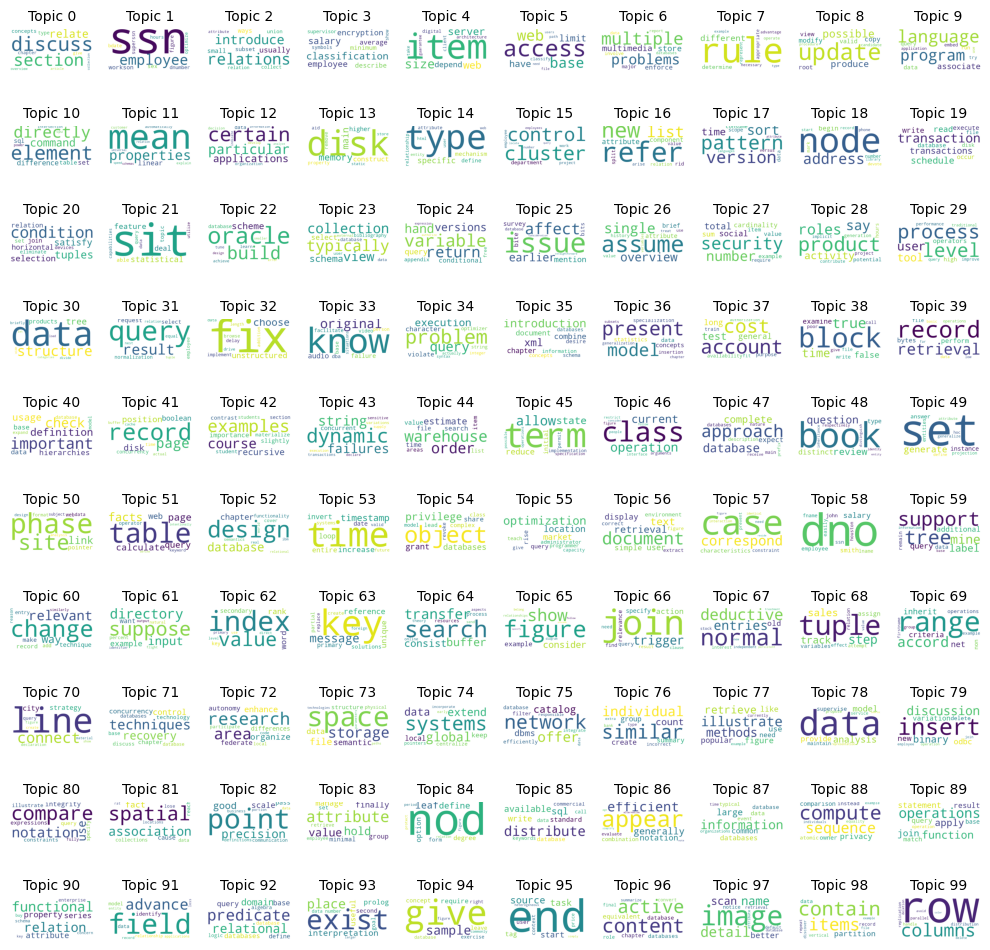

In [22]:

from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(background_color="white",mask=None, max_words=10,\
                        max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                        contour_width=3,contour_color='black')

topics = ldamodel.show_topics(formatted=False,num_topics = 100)
# print(topics)
fig, axes = plt.subplots(10,10, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
#     print(topic_words)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=10))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


In [23]:
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

dict_ = corpora.Dictionary(prepro_data)

doc_term_matrix = [dict_.doc2bow(i) for i in prepro_data]
# print(doc_term_matrix)
co_val=[]
Lda = gensim.models.ldamodel.LdaModel
for j in range(100,130):
    print(j)
    ldamodel = Lda(doc_term_matrix, num_topics=j, id2word = dict_, passes=1, random_state=0, eval_every=None)
    for k in ldamodel.print_topics(num_topics=len(prepro_data), num_words=10):
        print(k)
    topicwise_words = []
    topics = ldamodel.show_topics(formatted=False)
#     print(topics)
    for i in range(len(topics)):
        topic_words = dict(topics[i][1])
        word = []
        for ky in topic_words:
            word.append(ky)
        topicwise_words.append(word)

    # print(topicwise_words)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=topicwise_words, dictionary=dict_, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    co_val.append(coherence_lda)
    print('\nCoherence Score: ', coherence_lda)
print(co_val)

100
(0, '0.322*"discuss" + 0.226*"section" + 0.092*"relate" + 0.044*"concepts" + 0.037*"type" + 0.030*"chapter" + 0.021*"give" + 0.018*"overview" + 0.014*"article" + 0.011*"collection"')
(1, '0.090*"ssn" + 0.067*"employee" + 0.057*"workson" + 0.050*"sex" + 0.041*"figure" + 0.040*"dnumber" + 0.035*"superssn" + 0.032*"hours" + 0.031*"bdate" + 0.029*"optimize"')
(2, '0.154*"relations" + 0.106*"introduce" + 0.082*"usually" + 0.060*"small" + 0.056*"ways" + 0.049*"subset" + 0.042*"union" + 0.035*"collect" + 0.031*"relation" + 0.020*"attribute"')
(3, '0.121*"classification" + 0.108*"salary" + 0.095*"employee" + 0.083*"encryption" + 0.061*"average" + 0.057*"describe" + 0.052*"minimum" + 0.041*"supervisor" + 0.038*"symbols" + 0.032*"show"')
(4, '0.197*"item" + 0.104*"size" + 0.068*"server" + 0.066*"web" + 0.057*"depend" + 0.051*"digital" + 0.045*"client" + 0.041*"take" + 0.040*"architecture" + 0.034*"guarantee"')
(5, '0.297*"access" + 0.144*"web" + 0.132*"base" + 0.041*"have" + 0.041*"limit" + 

(0, '0.155*"disk" + 0.109*"main" + 0.089*"memory" + 0.072*"bytes" + 0.053*"buffer" + 0.041*"audio" + 0.032*"technology" + 0.021*"video" + 0.020*"database" + 0.019*"access"')
(1, '0.112*"technique" + 0.101*"execute" + 0.097*"check" + 0.065*"company" + 0.046*"difficult" + 0.044*"small" + 0.043*"goal" + 0.040*"database" + 0.035*"query" + 0.033*"potential"')
(2, '0.176*"occur" + 0.114*"estimate" + 0.085*"element" + 0.069*"event" + 0.051*"option" + 0.034*"duplicate" + 0.033*"nonkey" + 0.024*"dynamically" + 0.023*"extension" + 0.016*"cascade"')
(3, '0.183*"techniques" + 0.167*"access" + 0.064*"assume" + 0.050*"tree" + 0.040*"good" + 0.034*"message" + 0.034*"file" + 0.028*"internal" + 0.024*"structure" + 0.022*"path"')
(4, '0.305*"index" + 0.119*"cluster" + 0.081*"file" + 0.033*"disk" + 0.033*"page" + 0.023*"organize" + 0.022*"dynamic" + 0.020*"create" + 0.020*"structure" + 0.018*"data"')
(5, '0.125*"account" + 0.112*"cost" + 0.084*"perform" + 0.068*"suppose" + 0.060*"ensure" + 0.041*"percent

(0, '0.156*"construct" + 0.079*"belong" + 0.058*"model" + 0.054*"specialization" + 0.041*"generalization" + 0.032*"eer" + 0.029*"categories" + 0.028*"balance" + 0.025*"bank" + 0.022*"rank"')
(1, '0.253*"sample" + 0.107*"service" + 0.090*"city" + 0.066*"answer" + 0.046*"speech" + 0.030*"sure" + 0.027*"query" + 0.024*"figure" + 0.024*"open" + 0.016*"raise"')
(2, '0.136*"enhance" + 0.124*"directly" + 0.075*"person" + 0.064*"respectively" + 0.044*"aid" + 0.035*"miss" + 0.034*"draw" + 0.026*"data" + 0.020*"base" + 0.020*"instructor"')
(3, '0.218*"figure" + 0.215*"show" + 0.055*"directory" + 0.044*"examples" + 0.033*"example" + 0.032*"goal" + 0.025*"look" + 0.022*"inheritance" + 0.021*"decide" + 0.021*"object"')
(4, '0.165*"research" + 0.088*"houston" + 0.054*"administration" + 0.038*"stafford" + 0.035*"turn" + 0.033*"sugarland" + 0.020*"york" + 0.020*"producty" + 0.019*"figure" + 0.018*"credentials"')
(5, '0.209*"cluster" + 0.115*"users" + 0.101*"relevant" + 0.073*"know" + 0.049*"discussion

(0, '0.195*"notation" + 0.106*"share" + 0.098*"environment" + 0.038*"give" + 0.031*"overview" + 0.030*"hardware" + 0.027*"redundancy" + 0.023*"specify" + 0.022*"presentation" + 0.021*"use"')
(1, '0.317*"figure" + 0.256*"show" + 0.093*"transfer" + 0.046*"example" + 0.028*"direct" + 0.020*"specify" + 0.018*"complex" + 0.017*"type" + 0.015*"attribute" + 0.013*"think"')
(2, '0.380*"set" + 0.050*"distinct" + 0.038*"combination" + 0.035*"want" + 0.030*"suppose" + 0.029*"fit" + 0.026*"relation" + 0.024*"type" + 0.021*"key" + 0.020*"desirable"')
(3, '0.114*"available" + 0.091*"feature" + 0.085*"way" + 0.079*"sort" + 0.068*"efficient" + 0.040*"online" + 0.038*"data" + 0.035*"technologies" + 0.028*"summarize" + 0.027*"process"')
(4, '0.171*"case" + 0.151*"compute" + 0.095*"illustrate" + 0.081*"sequence" + 0.074*"depend" + 0.045*"take" + 0.033*"example" + 0.018*"selectivity" + 0.018*"use" + 0.018*"follow"')
(5, '0.116*"address" + 0.075*"interest" + 0.070*"events" + 0.057*"able" + 0.051*"remove" +

(0, '0.158*"schedule" + 0.129*"read" + 0.064*"memory" + 0.062*"disk" + 0.060*"buffer" + 0.060*"transfer" + 0.044*"write" + 0.042*"main" + 0.040*"level" + 0.038*"data"')
(1, '0.138*"case" + 0.132*"source" + 0.108*"generate" + 0.101*"supervise" + 0.060*"leave" + 0.053*"products" + 0.040*"right" + 0.031*"subordinate" + 0.025*"figure" + 0.022*"aid"')
(2, '0.214*"contain" + 0.086*"schema" + 0.076*"facts" + 0.068*"propose" + 0.068*"particular" + 0.045*"usually" + 0.041*"database" + 0.037*"automatically" + 0.031*"avoid" + 0.030*"derive"')
(3, '0.119*"interpretation" + 0.118*"normal" + 0.103*"modify" + 0.063*"goal" + 0.061*"topic" + 0.045*"continue" + 0.033*"statements" + 0.027*"model" + 0.026*"materialize" + 0.026*"minimize"')
(4, '0.384*"key" + 0.077*"reference" + 0.057*"scale" + 0.050*"attempt" + 0.026*"foreign" + 0.018*"implementations" + 0.016*"relation" + 0.015*"members" + 0.015*"attribute" + 0.014*"relations"')
(5, '0.184*"hold" + 0.100*"notice" + 0.076*"relation" + 0.037*"contribute" +

(0, '0.155*"functional" + 0.114*"organization" + 0.074*"develop" + 0.050*"enterprise" + 0.050*"popular" + 0.049*"commonly" + 0.043*"databases" + 0.031*"specialize" + 0.029*"plan" + 0.026*"evolve"')
(1, '0.160*"relevant" + 0.142*"space" + 0.108*"way" + 0.074*"company" + 0.063*"repeat" + 0.050*"schema" + 0.042*"primary" + 0.035*"figure" + 0.035*"separate" + 0.026*"internal"')
(2, '0.394*"index" + 0.160*"contain" + 0.066*"performance" + 0.048*"data" + 0.044*"return" + 0.024*"statistics" + 0.022*"tune" + 0.022*"structure" + 0.020*"usually" + 0.017*"keep"')
(3, '0.245*"control" + 0.113*"concurrency" + 0.066*"problems" + 0.064*"ensure" + 0.032*"topic" + 0.027*"main" + 0.027*"base" + 0.026*"need" + 0.025*"transaction" + 0.023*"database"')
(4, '0.102*"server" + 0.089*"precision" + 0.065*"client" + 0.064*"architecture" + 0.050*"oracle" + 0.039*"architectures" + 0.030*"drive" + 0.028*"database" + 0.028*"table" + 0.025*"web"')
(5, '0.114*"trigger" + 0.111*"check" + 0.106*"action" + 0.067*"delete"

(0, '0.238*"analysis" + 0.070*"data" + 0.060*"databases" + 0.054*"languages" + 0.035*"aspects" + 0.027*"persistent" + 0.027*"service" + 0.026*"come" + 0.019*"type" + 0.019*"interfaces"')
(1, '0.111*"compute" + 0.077*"form" + 0.071*"version" + 0.066*"organization" + 0.060*"methods" + 0.058*"deal" + 0.057*"choose" + 0.057*"complete" + 0.054*"multimedia" + 0.042*"base"')
(2, '0.107*"effect" + 0.098*"strategy" + 0.081*"partial" + 0.066*"differ" + 0.063*"replace" + 0.052*"part" + 0.049*"extract" + 0.035*"plan" + 0.030*"reserve" + 0.019*"need"')
(3, '0.207*"techniques" + 0.175*"tree" + 0.067*"data" + 0.066*"structure" + 0.051*"discuss" + 0.032*"interest" + 0.024*"access" + 0.024*"information" + 0.022*"base" + 0.018*"section"')
(4, '0.156*"depend" + 0.110*"tag" + 0.092*"delete" + 0.079*"attempt" + 0.054*"flight" + 0.046*"date" + 0.046*"zero" + 0.043*"table" + 0.034*"middle" + 0.016*"create"')
(5, '0.309*"transaction" + 0.143*"transactions" + 0.055*"implement" + 0.055*"users" + 0.043*"database

(0, '0.186*"discuss" + 0.100*"different" + 0.067*"facts" + 0.062*"concepts" + 0.052*"construct" + 0.050*"schema" + 0.033*"chapter" + 0.030*"map" + 0.029*"section" + 0.029*"database"')
(1, '0.150*"identify" + 0.094*"complete" + 0.070*"show" + 0.066*"remain" + 0.050*"convert" + 0.046*"precede" + 0.045*"diagram" + 0.044*"figure" + 0.035*"type" + 0.024*"similarly"')
(2, '0.228*"certain" + 0.183*"relations" + 0.090*"enhance" + 0.062*"revoke" + 0.057*"insertion" + 0.026*"relation" + 0.023*"easier" + 0.021*"privilege" + 0.011*"set" + 0.011*"convention"')
(3, '0.140*"detail" + 0.125*"version" + 0.123*"organization" + 0.102*"standard" + 0.063*"minimum" + 0.034*"simplify" + 0.033*"new" + 0.031*"object" + 0.027*"base" + 0.023*"materialize"')
(4, '0.187*"image" + 0.166*"oracle" + 0.085*"create" + 0.059*"scan" + 0.053*"reference" + 0.039*"table" + 0.027*"server" + 0.021*"include" + 0.020*"act" + 0.020*"key"')
(5, '0.131*"condition" + 0.099*"satisfy" + 0.080*"form" + 0.077*"better" + 0.065*"run" + 0

(0, '0.181*"change" + 0.110*"current" + 0.090*"return" + 0.079*"hold" + 0.073*"database" + 0.056*"typical" + 0.051*"time" + 0.040*"able" + 0.032*"cycle" + 0.026*"reflect"')
(1, '0.163*"problem" + 0.150*"sample" + 0.107*"way" + 0.086*"construct" + 0.041*"categories" + 0.032*"use" + 0.031*"eer" + 0.028*"artificial" + 0.028*"model" + 0.016*"older"')
(2, '0.319*"index" + 0.142*"contain" + 0.057*"introduce" + 0.053*"sort" + 0.052*"file" + 0.047*"characteristics" + 0.022*"relations" + 0.020*"authorization" + 0.019*"chapter" + 0.018*"duplicate"')
(3, '0.196*"concepts" + 0.096*"necessary" + 0.095*"summary" + 0.069*"internal" + 0.046*"chapter" + 0.046*"conceptual" + 0.045*"base" + 0.043*"define" + 0.025*"model" + 0.023*"large"')
(4, '0.147*"site" + 0.101*"write" + 0.086*"server" + 0.067*"involve" + 0.060*"digital" + 0.055*"client" + 0.053*"take" + 0.037*"run" + 0.028*"database" + 0.024*"item"')
(5, '0.156*"allow" + 0.123*"scheme" + 0.094*"line" + 0.074*"relationships" + 0.054*"representation" +

(0, '0.242*"discuss" + 0.119*"section" + 0.093*"pattern" + 0.092*"present" + 0.055*"notation" + 0.037*"use" + 0.032*"chapter" + 0.016*"database" + 0.016*"variations" + 0.016*"reflect"')
(1, '0.119*"trigger" + 0.107*"lead" + 0.103*"degree" + 0.086*"autonomy" + 0.085*"federate" + 0.081*"connect" + 0.077*"participate" + 0.075*"consistency" + 0.036*"desire" + 0.022*"mail"')
(2, '0.126*"problem" + 0.115*"certain" + 0.079*"decision" + 0.073*"data" + 0.046*"privacy" + 0.043*"role" + 0.030*"base" + 0.024*"understand" + 0.024*"discuss" + 0.023*"individuals"')
(3, '0.427*"transaction" + 0.043*"large" + 0.041*"briefly" + 0.036*"process" + 0.033*"classify" + 0.032*"database" + 0.031*"transactions" + 0.031*"affect" + 0.025*"online" + 0.023*"delay"')
(4, '0.306*"index" + 0.160*"table" + 0.073*"make" + 0.037*"access" + 0.034*"strategy" + 0.030*"path" + 0.026*"create" + 0.024*"query" + 0.020*"collect" + 0.018*"information"')
(5, '0.466*"rule" + 0.102*"label" + 0.092*"determine" + 0.030*"figure" + 0.03

(0, '0.180*"discuss" + 0.119*"account" + 0.115*"databases" + 0.078*"section" + 0.065*"construct" + 0.048*"typically" + 0.025*"differ" + 0.022*"difference" + 0.020*"loss" + 0.017*"data"')
(1, '0.302*"figure" + 0.243*"show" + 0.048*"database" + 0.036*"actual" + 0.034*"consider" + 0.032*"scale" + 0.025*"direct" + 0.023*"illustrate" + 0.015*"state" + 0.014*"use"')
(2, '0.236*"term" + 0.220*"techniques" + 0.042*"data" + 0.036*"discuss" + 0.031*"privacy" + 0.029*"chapter" + 0.026*"define" + 0.025*"database" + 0.017*"individuals" + 0.017*"recent"')
(3, '0.201*"time" + 0.091*"notation" + 0.088*"compare" + 0.067*"directory" + 0.065*"generally" + 0.050*"query" + 0.046*"average" + 0.042*"events" + 0.039*"improve" + 0.023*"use"')
(4, '0.098*"sales" + 0.095*"percent" + 0.094*"appear" + 0.062*"keywords" + 0.049*"lose" + 0.044*"server" + 0.041*"print" + 0.037*"string" + 0.031*"raise" + 0.027*"table"')
(5, '0.221*"distribute" + 0.219*"predicate" + 0.091*"assume" + 0.065*"detail" + 0.039*"effect" + 0.0

(0, '0.145*"discuss" + 0.143*"techniques" + 0.061*"database" + 0.046*"issue" + 0.043*"databases" + 0.039*"chapter" + 0.038*"bibliography" + 0.035*"revoke" + 0.031*"select" + 0.028*"section"')
(1, '0.103*"management" + 0.091*"supervise" + 0.079*"primary" + 0.078*"facts" + 0.074*"develop" + 0.061*"secondary" + 0.047*"pointers" + 0.045*"event" + 0.037*"key" + 0.029*"commercial"')
(2, '0.137*"versions" + 0.124*"degree" + 0.056*"dynamically" + 0.048*"define" + 0.042*"explicitly" + 0.038*"imply" + 0.034*"attribute" + 0.031*"maintenance" + 0.022*"apparent" + 0.020*"allow"')
(3, '0.129*"form" + 0.098*"main" + 0.093*"memory" + 0.087*"buffer" + 0.059*"disk" + 0.049*"digital" + 0.045*"improve" + 0.038*"hand" + 0.037*"service" + 0.035*"minimum"')
(4, '0.133*"transfer" + 0.075*"write" + 0.067*"disk" + 0.057*"take" + 0.054*"calculate" + 0.053*"average" + 0.047*"divide" + 0.041*"dynamic" + 0.036*"page" + 0.025*"actually"')
(5, '0.414*"document" + 0.139*"web" + 0.093*"collection" + 0.055*"valid" + 0.0

(0, '0.135*"sit" + 0.061*"interest" + 0.060*"affect" + 0.052*"data" + 0.050*"differences" + 0.043*"able" + 0.038*"differ" + 0.037*"languages" + 0.037*"discuss" + 0.034*"aspects"')
(1, '0.205*"term" + 0.080*"record" + 0.078*"current" + 0.039*"relate" + 0.039*"environment" + 0.034*"refer" + 0.034*"primary" + 0.032*"consider" + 0.032*"key" + 0.030*"say"')
(2, '0.158*"directory" + 0.084*"language" + 0.069*"describe" + 0.058*"embed" + 0.049*"program" + 0.040*"information" + 0.035*"explicitly" + 0.034*"customers" + 0.027*"database" + 0.022*"constitute"')
(3, '0.204*"salary" + 0.161*"employee" + 0.091*"ssn" + 0.052*"dno" + 0.049*"lname" + 0.047*"fname" + 0.044*"sex" + 0.039*"bdate" + 0.037*"superssn" + 0.037*"minit"')
(4, '0.137*"image" + 0.069*"server" + 0.068*"application" + 0.058*"database" + 0.047*"architecture" + 0.046*"deal" + 0.045*"client" + 0.043*"scan" + 0.031*"run" + 0.029*"cause"')
(5, '0.277*"transaction" + 0.125*"transactions" + 0.070*"execute" + 0.046*"process" + 0.045*"space" 

(0, '0.397*"different" + 0.066*"type" + 0.057*"achieve" + 0.053*"traditional" + 0.042*"initial" + 0.036*"data" + 0.034*"difference" + 0.023*"database" + 0.023*"use" + 0.020*"access"')
(1, '0.284*"case" + 0.076*"total" + 0.072*"hand" + 0.055*"use" + 0.044*"facilitate" + 0.031*"aid" + 0.027*"process" + 0.026*"software" + 0.026*"design" + 0.019*"notation"')
(2, '0.201*"allow" + 0.077*"operators" + 0.073*"properties" + 0.041*"train" + 0.039*"distribute" + 0.035*"fit" + 0.032*"comparison" + 0.032*"data" + 0.030*"collect" + 0.026*"desirable"')
(3, '0.279*"figure" + 0.207*"show" + 0.161*"distribute" + 0.054*"illustrate" + 0.041*"example" + 0.019*"examine" + 0.019*"examples" + 0.018*"database" + 0.014*"type" + 0.013*"use"')
(4, '0.223*"page" + 0.208*"web" + 0.087*"content" + 0.079*"write" + 0.039*"architecture" + 0.037*"take" + 0.037*"database" + 0.025*"commonly" + 0.025*"statistics" + 0.025*"architectures"')
(5, '0.321*"document" + 0.099*"compute" + 0.079*"know" + 0.047*"data" + 0.041*"organi

(0, '0.247*"relevant" + 0.102*"belong" + 0.100*"higher" + 0.088*"scale" + 0.064*"explain" + 0.025*"discuss" + 0.024*"past" + 0.021*"capacity" + 0.021*"perspective" + 0.018*"informally"')
(1, '0.258*"consider" + 0.200*"retrieval" + 0.060*"example" + 0.055*"date" + 0.054*"city" + 0.049*"entire" + 0.045*"flight" + 0.028*"company" + 0.024*"database" + 0.023*"tape"')
(2, '0.170*"figure" + 0.147*"show" + 0.090*"nod" + 0.085*"tree" + 0.070*"leaf" + 0.050*"total" + 0.042*"number" + 0.031*"product" + 0.031*"example" + 0.027*"look"')
(3, '0.102*"organize" + 0.083*"dynamic" + 0.060*"specialization" + 0.051*"subject" + 0.046*"generalization" + 0.045*"rewrite" + 0.042*"appendix" + 0.035*"paper" + 0.035*"simply" + 0.026*"half"')
(4, '0.162*"row" + 0.082*"variable" + 0.068*"selection" + 0.051*"condition" + 0.049*"query" + 0.045*"range" + 0.041*"table" + 0.038*"column" + 0.032*"final" + 0.030*"value"')
(5, '0.120*"correspond" + 0.101*"similar" + 0.091*"execute" + 0.086*"way" + 0.074*"object" + 0.060*"

(0, '0.131*"access" + 0.083*"index" + 0.083*"structure" + 0.075*"data" + 0.069*"chapter" + 0.054*"discuss" + 0.044*"advance" + 0.030*"document" + 0.029*"issue" + 0.027*"database"')
(1, '0.204*"transaction" + 0.130*"state" + 0.079*"database" + 0.067*"update" + 0.054*"modify" + 0.047*"percent" + 0.032*"like" + 0.030*"figure" + 0.028*"look" + 0.023*"change"')
(2, '0.147*"document" + 0.066*"privacy" + 0.057*"unstructured" + 0.056*"finally" + 0.054*"stock" + 0.045*"technologies" + 0.038*"survey" + 0.035*"xml" + 0.032*"individuals" + 0.028*"recent"')
(3, '0.097*"subject" + 0.077*"differ" + 0.074*"universal" + 0.066*"library" + 0.050*"half" + 0.038*"author" + 0.030*"model" + 0.028*"title" + 0.023*"discuss" + 0.023*"notation"')
(4, '0.121*"version" + 0.092*"server" + 0.085*"variable" + 0.066*"actual" + 0.060*"client" + 0.052*"standard" + 0.044*"conditional" + 0.043*"precede" + 0.040*"form" + 0.028*"sql"')
(5, '0.206*"design" + 0.085*"tool" + 0.073*"database" + 0.064*"data" + 0.063*"consist" + 

(0, '0.088*"line" + 0.084*"audio" + 0.073*"connect" + 0.062*"network" + 0.060*"scale" + 0.037*"area" + 0.033*"replace" + 0.030*"video" + 0.030*"dbmss" + 0.026*"article"')
(1, '0.126*"suppose" + 0.084*"indicate" + 0.064*"tag" + 0.060*"want" + 0.060*"versions" + 0.058*"manage" + 0.052*"entire" + 0.052*"lead" + 0.035*"data" + 0.030*"example"')
(2, '0.120*"technique" + 0.115*"assume" + 0.083*"sort" + 0.056*"access" + 0.055*"interface" + 0.044*"smaller" + 0.042*"able" + 0.033*"interfaces" + 0.031*"separate" + 0.028*"remote"')
(3, '0.104*"local" + 0.102*"generate" + 0.078*"handle" + 0.062*"call" + 0.059*"advantage" + 0.046*"pass" + 0.042*"data" + 0.041*"provide" + 0.038*"format" + 0.026*"capabilities"')
(4, '0.205*"operation" + 0.093*"depend" + 0.082*"original" + 0.078*"basic" + 0.051*"server" + 0.047*"recursive" + 0.045*"purpose" + 0.039*"operations" + 0.029*"query" + 0.027*"zero"')
(5, '0.314*"transaction" + 0.233*"document" + 0.063*"sit" + 0.059*"end" + 0.059*"web" + 0.035*"process" + 0.0

(0, '0.109*"rank" + 0.085*"component" + 0.081*"position" + 0.067*"fix" + 0.052*"technology" + 0.051*"length" + 0.045*"derive" + 0.035*"attribute" + 0.032*"bite" + 0.032*"student"')
(1, '0.293*"employee" + 0.155*"base" + 0.103*"service" + 0.067*"follow" + 0.036*"greater" + 0.033*"example" + 0.033*"tuple" + 0.026*"complexity" + 0.023*"select" + 0.017*"mail"')
(2, '0.255*"process" + 0.073*"totalsal" + 0.070*"tune" + 0.054*"separate" + 0.048*"embed" + 0.037*"query" + 0.031*"program" + 0.028*"implicitly" + 0.024*"subsequent" + 0.024*"use"')
(3, '0.133*"active" + 0.096*"chapter" + 0.079*"encryption" + 0.063*"entries" + 0.059*"data" + 0.059*"message" + 0.039*"advance" + 0.037*"section" + 0.029*"model" + 0.028*"discuss"')
(4, '0.141*"issue" + 0.098*"detail" + 0.081*"problems" + 0.079*"operations" + 0.073*"product" + 0.041*"syntax" + 0.040*"access" + 0.032*"potential" + 0.023*"server" + 0.023*"operation"')
(5, '0.195*"relationships" + 0.168*"diagram" + 0.066*"interpret" + 0.061*"activities" + 0

(0, '0.200*"cluster" + 0.065*"precision" + 0.046*"dno" + 0.039*"environment" + 0.034*"dnumber" + 0.029*"hours" + 0.027*"initial" + 0.025*"workson" + 0.024*"ssn" + 0.024*"pnumber"')
(1, '0.231*"require" + 0.103*"choose" + 0.048*"small" + 0.047*"symbols" + 0.036*"usually" + 0.034*"continue" + 0.031*"help" + 0.031*"universal" + 0.029*"choice" + 0.024*"units"')
(2, '0.157*"return" + 0.103*"question" + 0.102*"scan" + 0.080*"review" + 0.071*"tune" + 0.042*"scope" + 0.028*"languages" + 0.019*"type" + 0.016*"edition" + 0.015*"book"')
(3, '0.107*"logical" + 0.107*"average" + 0.094*"minimum" + 0.089*"salary" + 0.089*"relationships" + 0.070*"able" + 0.069*"sum" + 0.051*"physical" + 0.039*"maximum" + 0.019*"disk"')
(4, '0.174*"site" + 0.125*"involve" + 0.123*"execution" + 0.097*"server" + 0.093*"valid" + 0.059*"client" + 0.039*"run" + 0.024*"database" + 0.022*"plan" + 0.019*"turn"')
(5, '0.272*"time" + 0.150*"field" + 0.100*"occur" + 0.090*"determine" + 0.050*"value" + 0.047*"order" + 0.036*"event


Coherence Score:  -4.308309113124966
119
(0, '0.232*"relate" + 0.163*"link" + 0.117*"mechanism" + 0.115*"pointer" + 0.059*"instance" + 0.035*"include" + 0.034*"accomplish" + 0.033*"relationship" + 0.015*"use" + 0.012*"discuss"')
(1, '0.249*"employee" + 0.081*"stock" + 0.057*"continue" + 0.051*"dependent" + 0.043*"example" + 0.042*"query" + 0.041*"integer" + 0.040*"variations" + 0.030*"retrieve" + 0.019*"department"')
(2, '0.262*"page" + 0.081*"book" + 0.081*"web" + 0.045*"correct" + 0.044*"question" + 0.037*"review" + 0.033*"extract" + 0.033*"totalsal" + 0.030*"able" + 0.025*"distinguish"')
(3, '0.158*"show" + 0.154*"figure" + 0.066*"illustrate" + 0.061*"use" + 0.052*"example" + 0.042*"display" + 0.035*"market" + 0.027*"line" + 0.027*"let" + 0.023*"greater"')
(4, '0.164*"percent" + 0.099*"answer" + 0.068*"speech" + 0.066*"unauthorized" + 0.062*"protection" + 0.056*"inherit" + 0.055*"raise" + 0.027*"job" + 0.020*"question" + 0.017*"query"')
(5, '0.540*"set" + 0.048*"partial" + 0.035*"s

(0, '0.167*"structure" + 0.096*"version" + 0.081*"file" + 0.080*"data" + 0.057*"access" + 0.051*"interest" + 0.047*"logical" + 0.034*"paths" + 0.028*"organization" + 0.026*"collect"')
(1, '0.360*"key" + 0.127*"primary" + 0.088*"problems" + 0.067*"supervise" + 0.035*"relation" + 0.032*"attribute" + 0.030*"subordinate" + 0.023*"value" + 0.016*"relations" + 0.016*"consider"')
(2, '0.274*"type" + 0.249*"represent" + 0.065*"relationship" + 0.050*"attribute" + 0.044*"set" + 0.040*"relationships" + 0.035*"entity" + 0.025*"relation" + 0.024*"model" + 0.017*"data"')
(3, '0.201*"account" + 0.106*"relevant" + 0.102*"indicate" + 0.080*"simple" + 0.061*"need" + 0.047*"move" + 0.045*"privilege" + 0.039*"dba" + 0.031*"operator" + 0.023*"components"')
(4, '0.247*"site" + 0.119*"research" + 0.071*"location" + 0.067*"dynamic" + 0.043*"ibm" + 0.031*"act" + 0.029*"houston" + 0.028*"stafford" + 0.025*"sugarland" + 0.022*"result"')
(5, '0.211*"cost" + 0.185*"source" + 0.142*"associate" + 0.072*"type" + 0.05

(0, '0.312*"file" + 0.074*"access" + 0.063*"physical" + 0.062*"message" + 0.045*"pass" + 0.040*"parameters" + 0.035*"paths" + 0.031*"send" + 0.030*"database" + 0.030*"structure"')
(1, '0.518*"record" + 0.073*"particular" + 0.071*"bytes" + 0.046*"value" + 0.029*"length" + 0.026*"file" + 0.021*"eliminate" + 0.019*"instead" + 0.016*"key" + 0.014*"identify"')
(2, '0.169*"salary" + 0.119*"valid" + 0.109*"performance" + 0.054*"tune" + 0.037*"network" + 0.036*"business" + 0.034*"employee" + 0.033*"areas" + 0.032*"type" + 0.028*"sex"')
(3, '0.125*"source" + 0.097*"network" + 0.089*"storage" + 0.071*"data" + 0.060*"products" + 0.047*"minimum" + 0.039*"memory" + 0.038*"smaller" + 0.029*"systems" + 0.027*"information"')
(4, '0.161*"oracle" + 0.124*"common" + 0.099*"illustrate" + 0.083*"server" + 0.050*"architecture" + 0.044*"client" + 0.034*"partial" + 0.024*"replace" + 0.022*"duplicate" + 0.021*"use"')
(5, '0.159*"relationships" + 0.123*"notation" + 0.098*"provide" + 0.076*"symbols" + 0.043*"use

(0, '0.273*"items" + 0.202*"important" + 0.109*"sequence" + 0.087*"display" + 0.060*"role" + 0.053*"type" + 0.039*"diagram" + 0.029*"play" + 0.014*"discuss" + 0.013*"information"')
(1, '0.275*"level" + 0.139*"determine" + 0.057*"primary" + 0.054*"repeat" + 0.052*"higher" + 0.044*"topic" + 0.034*"explain" + 0.027*"potential" + 0.026*"data" + 0.023*"need"')
(2, '0.183*"element" + 0.086*"insertion" + 0.084*"convert" + 0.074*"duplicate" + 0.064*"separate" + 0.044*"attribute" + 0.039*"sure" + 0.028*"example" + 0.021*"specify" + 0.018*"relations"')
(3, '0.195*"occur" + 0.188*"label" + 0.169*"active" + 0.032*"database" + 0.029*"universal" + 0.025*"use" + 0.024*"contrast" + 0.022*"previously" + 0.021*"events" + 0.017*"separately"')
(4, '0.221*"site" + 0.123*"server" + 0.075*"client" + 0.055*"smaller" + 0.053*"code" + 0.034*"data" + 0.028*"file" + 0.026*"underlie" + 0.024*"materialize" + 0.023*"access"')
(5, '0.074*"sql" + 0.073*"symbols" + 0.070*"reach" + 0.045*"portion" + 0.039*"longer" + 0.0

(0, '0.263*"databases" + 0.125*"image" + 0.086*"problem" + 0.051*"precision" + 0.050*"deal" + 0.050*"information" + 0.036*"analyze" + 0.028*"organizations" + 0.027*"systems" + 0.025*"data"')
(1, '0.162*"consider" + 0.110*"indicate" + 0.099*"track" + 0.070*"manage" + 0.048*"example" + 0.046*"potential" + 0.046*"supervisor" + 0.045*"employee" + 0.045*"follow" + 0.026*"express"')
(2, '0.137*"event" + 0.129*"operation" + 0.066*"remote" + 0.065*"collect" + 0.054*"locations" + 0.045*"considerations" + 0.028*"record" + 0.024*"patient" + 0.023*"navigation" + 0.021*"action"')
(3, '0.173*"detail" + 0.110*"relationships" + 0.094*"pointers" + 0.067*"data" + 0.065*"commercial" + 0.040*"arise" + 0.038*"help" + 0.031*"provide" + 0.026*"miss" + 0.024*"financial"')
(4, '0.323*"warehouse" + 0.274*"order" + 0.053*"scan" + 0.031*"operations" + 0.030*"customer" + 0.026*"operation" + 0.021*"replace" + 0.014*"example" + 0.014*"query" + 0.014*"item"')
(5, '0.188*"create" + 0.171*"base" + 0.084*"action" + 0.07

(0, '0.217*"issue" + 0.166*"transfer" + 0.066*"bibliography" + 0.062*"data" + 0.060*"select" + 0.053*"load" + 0.039*"explain" + 0.025*"sequential" + 0.025*"article" + 0.017*"database"')
(1, '0.231*"mean" + 0.116*"base" + 0.061*"requirements" + 0.055*"real" + 0.049*"semantics" + 0.046*"database" + 0.043*"world" + 0.033*"help" + 0.031*"understand" + 0.028*"design"')
(2, '0.100*"partial" + 0.099*"interface" + 0.082*"similarly" + 0.064*"update" + 0.063*"zero" + 0.058*"operations" + 0.048*"arbitrary" + 0.037*"reserve" + 0.034*"carry" + 0.028*"informally"')
(3, '0.164*"request" + 0.157*"relationships" + 0.089*"necessary" + 0.061*"transform" + 0.040*"arise" + 0.034*"data" + 0.032*"numerous" + 0.028*"attribute" + 0.024*"update" + 0.023*"need"')
(4, '0.114*"combine" + 0.068*"buy" + 0.064*"aggregate" + 0.063*"bite" + 0.058*"operation" + 0.053*"bits" + 0.050*"outer" + 0.045*"operations" + 0.042*"function" + 0.034*"join"')
(5, '0.230*"cluster" + 0.175*"relations" + 0.076*"create" + 0.068*"relation

(0, '0.218*"functional" + 0.160*"precision" + 0.081*"strategy" + 0.071*"enterprise" + 0.035*"treat" + 0.033*"human" + 0.020*"letter" + 0.018*"type" + 0.018*"discuss" + 0.017*"lowercase"')
(1, '0.150*"problems" + 0.127*"secondary" + 0.089*"environment" + 0.059*"technologies" + 0.055*"potential" + 0.053*"greater" + 0.041*"data" + 0.038*"artificial" + 0.030*"primary" + 0.025*"redundancy"')
(2, '0.122*"document" + 0.121*"available" + 0.111*"text" + 0.075*"relevance" + 0.063*"element" + 0.053*"find" + 0.046*"privacy" + 0.025*"automatic" + 0.024*"topics" + 0.023*"restrict"')
(3, '0.375*"search" + 0.057*"develop" + 0.052*"information" + 0.045*"characteristics" + 0.045*"improve" + 0.044*"directory" + 0.038*"web" + 0.032*"use" + 0.025*"techniques" + 0.025*"discuss"')
(4, '0.120*"server" + 0.100*"architecture" + 0.089*"web" + 0.088*"client" + 0.059*"architectures" + 0.047*"database" + 0.041*"likely" + 0.031*"machine" + 0.027*"cpu" + 0.024*"teach"')
(5, '0.089*"appropriate" + 0.063*"comparison" +

(0, '0.250*"predicate" + 0.233*"define" + 0.155*"user" + 0.048*"boolean" + 0.032*"basic" + 0.026*"constant" + 0.020*"call" + 0.018*"follow" + 0.014*"reside" + 0.012*"chapter"')
(1, '0.280*"label" + 0.095*"difficult" + 0.081*"strategy" + 0.070*"direct" + 0.045*"practice" + 0.036*"desire" + 0.036*"identical" + 0.031*"plan" + 0.028*"execution" + 0.023*"methods"')
(2, '0.338*"document" + 0.156*"web" + 0.093*"content" + 0.053*"valid" + 0.032*"users" + 0.031*"user" + 0.024*"centralize" + 0.023*"use" + 0.023*"access" + 0.021*"categories"')
(3, '0.111*"exercise" + 0.106*"request" + 0.044*"difference" + 0.042*"data" + 0.037*"discuss" + 0.032*"operations" + 0.029*"materialize" + 0.028*"consider" + 0.025*"commerce" + 0.025*"section"')
(4, '0.243*"possible" + 0.140*"check" + 0.104*"depend" + 0.090*"assign" + 0.044*"time" + 0.029*"filter" + 0.028*"agent" + 0.024*"seat" + 0.022*"number" + 0.022*"middle"')
(5, '0.430*"rule" + 0.096*"occur" + 0.085*"certain" + 0.082*"active" + 0.062*"general" + 0.039*

(0, '0.218*"process" + 0.198*"form" + 0.065*"traditional" + 0.045*"data" + 0.039*"databases" + 0.035*"development" + 0.028*"need" + 0.027*"collect" + 0.027*"discuss" + 0.026*"utilize"')
(1, '0.089*"limit" + 0.072*"procedure" + 0.068*"degree" + 0.049*"answer" + 0.048*"use" + 0.042*"likely" + 0.039*"people" + 0.034*"speech" + 0.033*"design" + 0.032*"target"')
(2, '0.108*"elements" + 0.102*"partial" + 0.080*"replace" + 0.074*"remote" + 0.067*"personal" + 0.059*"zero" + 0.052*"easier" + 0.038*"reserve" + 0.029*"computers" + 0.021*"type"')
(3, '0.207*"user" + 0.076*"generate" + 0.068*"users" + 0.052*"like" + 0.037*"database" + 0.036*"support" + 0.032*"pass" + 0.030*"systems" + 0.029*"data" + 0.028*"access"')
(4, '0.209*"site" + 0.114*"problems" + 0.094*"selection" + 0.090*"research" + 0.057*"finally" + 0.051*"column" + 0.040*"server" + 0.032*"client" + 0.028*"web" + 0.023*"condition"')
(5, '0.338*"class" + 0.068*"symbols" + 0.066*"instance" + 0.064*"entities" + 0.034*"balance" + 0.030*"set"

(0, '0.317*"techniques" + 0.117*"present" + 0.082*"discuss" + 0.059*"chapter" + 0.045*"note" + 0.045*"data" + 0.041*"later" + 0.037*"direct" + 0.034*"path" + 0.028*"aspects"')
(1, '0.200*"figure" + 0.192*"show" + 0.105*"require" + 0.054*"definition" + 0.041*"example" + 0.032*"summary" + 0.028*"database" + 0.025*"failures" + 0.022*"split" + 0.019*"decide"')
(2, '0.275*"process" + 0.136*"allow" + 0.071*"current" + 0.062*"way" + 0.059*"high" + 0.056*"query" + 0.037*"data" + 0.033*"organizations" + 0.031*"performance" + 0.020*"duplicate"')
(3, '0.275*"mine" + 0.155*"data" + 0.059*"pass" + 0.049*"let" + 0.035*"remote" + 0.034*"send" + 0.027*"virtual" + 0.020*"narayan" + 0.020*"day" + 0.018*"screen"')
(4, '0.366*"field" + 0.084*"old" + 0.058*"customer" + 0.047*"data" + 0.028*"closure" + 0.028*"key" + 0.025*"include" + 0.025*"type" + 0.023*"fraction" + 0.021*"plus"')
(5, '0.214*"list" + 0.172*"concurrency" + 0.138*"know" + 0.075*"develop" + 0.042*"symbols" + 0.030*"transactions" + 0.024*"attr

(0, '0.094*"differences" + 0.080*"revoke" + 0.078*"conditional" + 0.075*"transform" + 0.067*"differ" + 0.049*"houston" + 0.033*"discuss" + 0.031*"sugarland" + 0.030*"variable" + 0.023*"terminology"')
(1, '0.111*"transaction" + 0.092*"develop" + 0.085*"methods" + 0.062*"choose" + 0.060*"pointers" + 0.053*"affect" + 0.043*"wide" + 0.040*"access" + 0.035*"database" + 0.034*"early"')
(2, '0.283*"security" + 0.185*"items" + 0.042*"social" + 0.035*"attempt" + 0.035*"insertion" + 0.029*"number" + 0.028*"drive" + 0.026*"database" + 0.025*"operator" + 0.022*"example"')
(3, '0.124*"location" + 0.100*"pass" + 0.095*"arguments" + 0.092*"return" + 0.069*"concern" + 0.067*"send" + 0.040*"package" + 0.037*"database" + 0.025*"modern" + 0.024*"element"')
(4, '0.457*"table" + 0.086*"create" + 0.069*"unstructured" + 0.038*"temporary" + 0.035*"example" + 0.027*"manner" + 0.017*"figure" + 0.015*"york" + 0.011*"view" + 0.010*"cli"')
(5, '0.478*"base" + 0.084*"salary" + 0.065*"average" + 0.037*"create" + 0.0

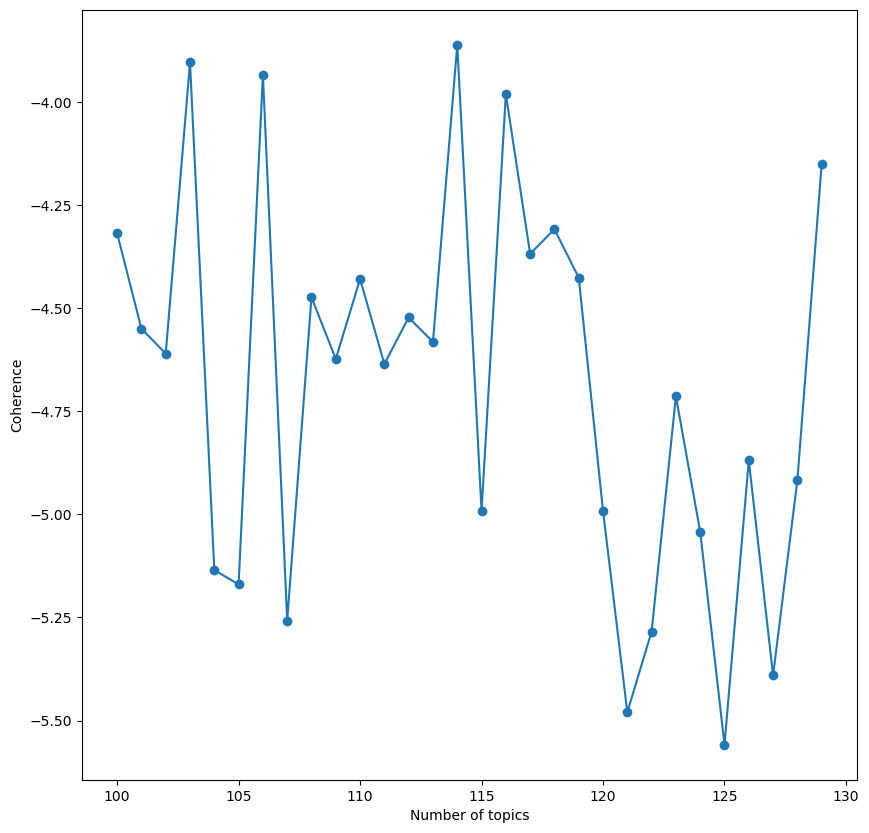

In [24]:
axisy = list(range(100,130))
plt.figure(figsize=(10,10))
plt.plot(axisy,co_val,marker = 'o')
plt.xlabel("Number of topics")
plt.ylabel("Coherence")
plt.show()